## Questions:

Provided are 3 CSV files **books.csv**, **book_tags.csv** and **ratings.csv** for the assessment.

 Candidate must create a jupyter notebook which processes the data provided in the CSV files to solve the following questions within the time limit provided.


1) How many books do not have an original title [books.csv]?

2) How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

3) How many unique users are present in the dataset [ratings.csv] ?

4) How many unique tags are there in the dataset [book_tags.csv] ?

5) Which tag_id  is the most frequently used ie. mapped with the highest number of books [book_tags.csv]  ? 
(In case of more than one tag, mention the tag id with the least numerical value)’.

6) Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

7) Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
books_df = pd.read_csv('books.csv')
tags_df = pd.read_csv('book_tags.csv')
ratings_df = pd.read_csv('ratings.csv')

In [129]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [130]:
tags_df.head()

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78


In [131]:
ratings_df.head()

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4


# Question 1

In [132]:
num_of_no_org_titles = len(books_df[books_df['original_title'].isna()])

In [133]:
print('No. of books that do not have an original title are {}'.format(num_of_no_org_titles))

No. of books that do not have an original title are 36


# Question 2

In [134]:
books_nulldf = books_df[books_df['original_title'].isna()]
books_nonulldf = books_df[books_df['original_title'].notnull()]

In [135]:
uniq_books = books_nonulldf['book_id'].nunique()

In [136]:
print('No. of unique books that are present in the books.csv are {}'.format(uniq_books))

No. of unique books that are present in the books.csv are 363


In [137]:
uniq_r = len(ratings_df[ratings_df['book_id'].isin(books_nonulldf['book_id'])])

In [138]:
uniq_t = len(tags_df[tags_df['goodreads_book_id'].isin(books_nonulldf['goodreads_book_id'])])

In [139]:
print('No. of unique books that are present in the book_tags.csv and ratings.csv are {} and {}'.format(uniq_t, uniq_r))

No. of unique books that are present in the book_tags.csv and ratings.csv are 36300 and 225939


# Question 3

In [140]:
uniq_users_rating = len(ratings_df['user_id'].unique())

In [141]:
print('No. of unique users present in users.csv are {}'.format(uniq_users_rating))

No. of unique users present in users.csv are 40836


# Question 4

In [142]:
uniq_tags_tags = len(tags_df['tag_id'].unique())

In [143]:
print('No. of unique tags present in tags.csv are {}'.format(uniq_tags_tags))

No. of unique tags present in tags.csv are 3651


# Question 5

In [144]:
freq_tagid = tags_df['tag_id'].value_counts().idxmax()

In [145]:
print('Most frequently used tag_id is {}'.format(freq_tagid))

Most frequently used tag_id is 4600


# Question 6

In [146]:
merged_df = books_df.merge(tags_df, on = 'goodreads_book_id')

In [147]:
kdfn = merged_df.groupby('original_title')['count'].sum().reset_index()

In [148]:
kdfn

,original_title,count
0,'Tis: A Memoir,5958
1,"84, Charing Cross Road",37479
2,90 Minutes in Heaven,12482
3,A Beautiful Mind,60563
4,"A Child Called ""It"": One Child's Courage to Su...",35276
...,...,...
358,You're Never Weird on the Internet (Almost),67639
359,sTORI Telling,4483
360,İstanbul: Hatıralar ve Şehir,4604
361,窓ぎわのトットちゃん,4647


In [149]:
idx = kdfn[kdfn['count'] == kdfn['count'].max()]['original_title']

In [150]:
idx.values[0]

'Bossypants'

# Question 7

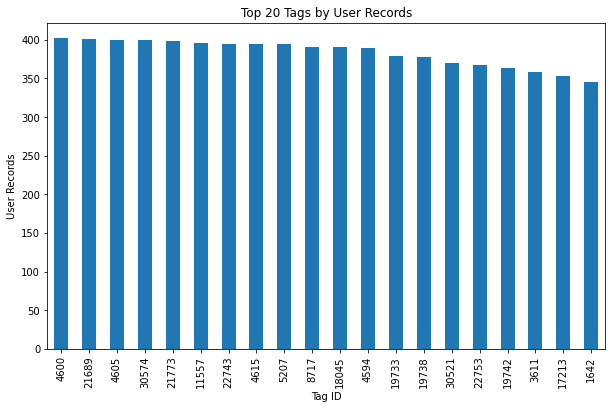

In [151]:
top_tags = tags_df.groupby('tag_id').size().sort_values(ascending=False).head(20)
top_tags.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.show()